In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
 import pandas as pd
import numpy as np


# Load the CSV file

df = pd.read_csv('/kaggle/input/marketing/f30days.csv')

# Remove the '$' symbol and commas, then convert to float
df['spend_usd'] = df['spend_usd'].replace({'\$': '', ',': '', ' -': np.nan}, regex=True).astype(float)

 

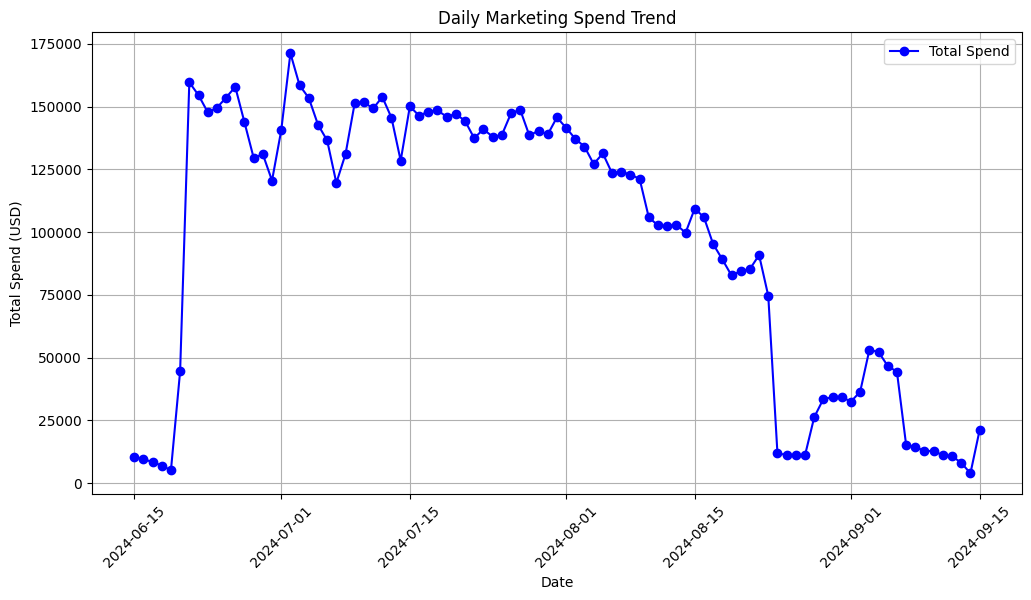

In [12]:
import matplotlib.pyplot as plt

# Drop rows with missing spend values
df.dropna(subset=['spend_usd'], inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Pivot data to get total spend per day
daily_spend = df.groupby('date')['spend_usd'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_spend['date'], daily_spend['spend_usd'], marker='o', linestyle='-', color='b', label='Total Spend')
plt.xlabel('Date')
plt.ylabel('Total Spend (USD)')
plt.title('Daily Marketing Spend Trend')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
